In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Allpass filter

In [3]:
def a1_coefficient(break_frequency, sampling_rate):
    tan = np.tan(np.pi * break_frequency / sampling_rate)
    return (tan - 1) / (tan + 1)

def allpass_filter(input_signal, break_frequency, sampling_rate):
    # The allpass coefficient
    a1 = a1_coefficient(break_frequency, sampling_rate)

    # Initialize the output array
    allpass_output = np.zeros_like(input_signal)

    # Initialize the inner 1-sample buffer
    dn_1 = 0

    for n in range(input_signal.shape[0]):
        # The allpass difference equation
        # Check the article on the allpass filter for an 
        # in-depth explanation
        allpass_output[n] = a1 * input_signal[n] + dn_1

        # Store a value in the inner buffer for the 
        # next iteration
        dn_1 = input_signal[n] - a1 * allpass_output[n]
    return allpass_output

def allpass_based_filter(input_signal, cutoff_frequency, sampling_rate, highpass=False, amplitude=1.0):
    # Perform allpass filtering
    allpass_output = allpass_filter(input_signal, cutoff_frequency, sampling_rate)

    # If we want a highpass, we need to invert 
    # the allpass output in phase
    if highpass:
        allpass_output *= -1

    # Sum the allpass output with the direct path
    filter_output = input_signal + allpass_output

    # Scale the amplitude to prevent clipping
    filter_output *= 0.5

    # Apply the given amplitude
    filter_output *= amplitude

    return filter_output

In [7]:
SAMPLE_RATE_HZ = 40.0

df = pd.read_csv('../data/pressure_recording.csv')

In [11]:
lpf = allpass_based_filter(df['pressure'], cutoff_frequency=0.2, sampling_rate=SAMPLE_RATE_HZ)
hpf = allpass_based_filter(df['pressure'], cutoff_frequency=2.0, sampling_rate=SAMPLE_RATE_HZ, highpass=True, amplitude=100.0)

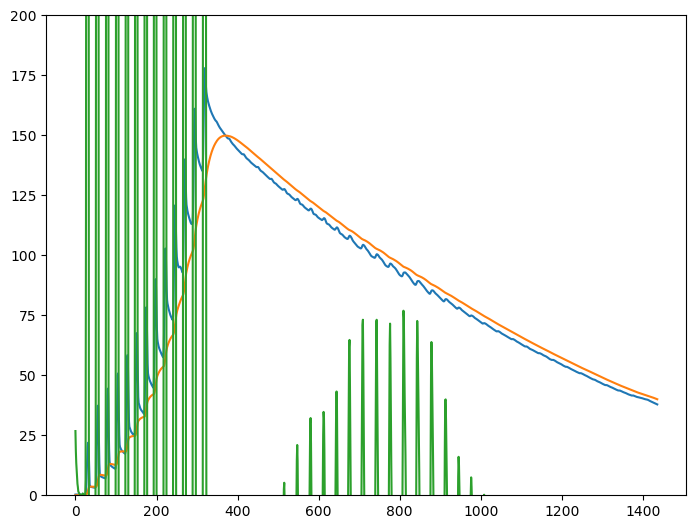

In [12]:
figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
axes.set_ylim(0, 200)

axes.plot(df['pressure'])
axes.plot(lpf)
axes.plot(hpf)

plt.show()